<a href="https://colab.research.google.com/github/Filburb/Filburb/blob/main/rmse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [3]:
file_path = 'data_balita.csv'
data = pd.read_csv(file_path)

In [6]:
print(data.isnull().sum())

Umur (bulan)         0
Jenis Kelamin        0
Tinggi Badan (cm)    0
Status Gizi          1
dtype: int64


In [8]:
label_encoder = LabelEncoder()
data['Jenis Kelamin'] = label_encoder.fit_transform(data['Jenis Kelamin'])
data['Status Gizi'] = label_encoder.fit_transform(data['Status Gizi'])

In [10]:
X = data[['Umur (bulan)', 'Jenis Kelamin', 'Status Gizi']]
y = data['Tinggi Badan (cm)']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
predictions = model.predict(X_test)

In [14]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('Root Mean Square Error (RMSE):', rmse)

Root Mean Square Error (RMSE): 7.157768359924575


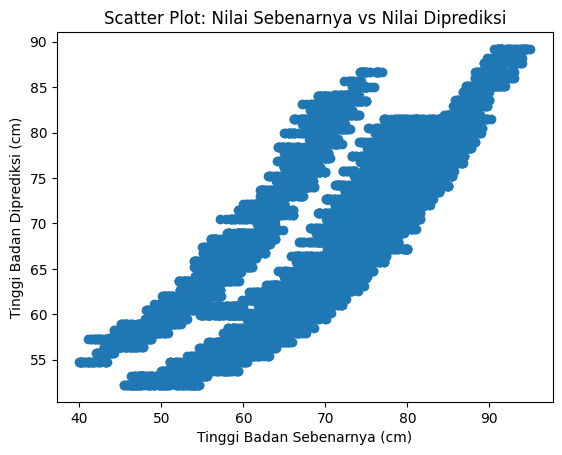

In [16]:
plt.scatter(y_test, predictions)
plt.xlabel('Tinggi Badan Sebenarnya (cm)')
plt.ylabel('Tinggi Badan Diprediksi (cm)')
plt.title('Scatter Plot: Nilai Sebenarnya vs Nilai Diprediksi')
plt.show()

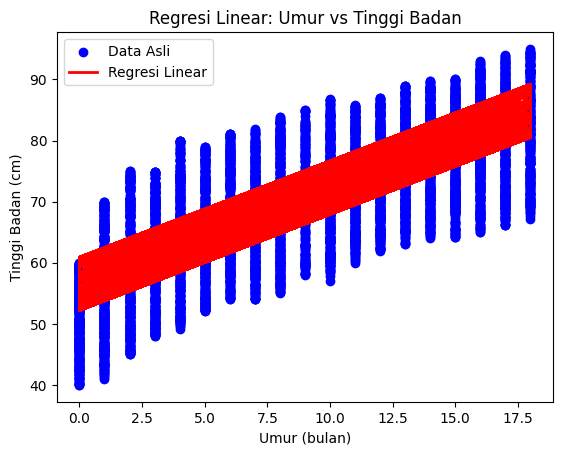

In [17]:
plt.scatter(X_test['Umur (bulan)'], y_test, color='blue', label='Data Asli')
plt.plot(X_test['Umur (bulan)'], predictions, color='red', linewidth=2, label='Regresi Linear')
plt.xlabel('Umur (bulan)')
plt.ylabel('Tinggi Badan (cm)')
plt.title('Regresi Linear: Umur vs Tinggi Badan')
plt.legend()
plt.show()